In [8]:
import geopandas as gpd
import numpy as np
from shapely.geometry import box

# Load the shapefile
gdf = gpd.read_file('UK_PPT_DEM_12km.shp')

# Define grid size in meters (adjust as needed)
x_interval = 80000  # e.g., 10 km
y_interval = 80000  # e.g., 10 km

# Get the bounds of the entire dataset
x_min_global, y_min_global, x_max_global, y_max_global = gdf.total_bounds

# Create subregions as bounding boxes
def create_subregions(x_min, x_max, y_min, y_max, x_interval, y_interval):
    subregions = []
    x_bins = np.arange(x_min, x_max + x_interval, x_interval)
    y_bins = np.arange(y_min, y_max + y_interval, y_interval)
    
    for i in range(len(x_bins) - 1):
        for j in range(len(y_bins) - 1):
            min_x_bin = x_bins[i]
            max_x_bin = x_bins[i + 1]
            min_y_bin = y_bins[j]
            max_y_bin = y_bins[j + 1]
            subregions.append(box(min_x_bin, min_y_bin, max_x_bin, max_y_bin))
    
    return subregions

# Generate subregions
subregions = create_subregions(x_min_global, x_max_global, y_min_global, y_max_global, x_interval, y_interval)

# Create a GeoDataFrame for subregions
subregions_gdf = gpd.GeoDataFrame({'geometry': subregions}, crs=gdf.crs)

# Optionally add a unique ID or name for each subregion
subregions_gdf['subregion_id'] = range(len(subregions_gdf))

# Spatial join to assign subregions to the original GeoDataFrame
gdf_with_subregions = gdf.copy()
gdf_with_subregions['subregion_id'] = None

for index, row in subregions_gdf.iterrows():
    subregion_polygon = row['geometry']
    mask = gdf.intersects(subregion_polygon)
    gdf_with_subregions.loc[mask, 'subregion_id'] = index

# Save the updated GeoDataFrame with subregion information
gdf_with_subregions.to_file('subregions.shp')

print("Shapefile with subregions saved successfully.")


Shapefile with subregions saved successfully.


C:\Users\vibhu\AppData\Local\Temp\ipykernel_1616\1154926897.py:50: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_with_subregions.to_file('subregions.shp')
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'subregion_id' to 'subregion_'
  ogr_write(


In [20]:
import geopandas as gpd

# Load the shapefile with subregions
gdf_with_subregions = gpd.read_file('subregions.shp')

# Group by 'subregion_id' and find subregions with at least one coastal point
coastal_subregions = gdf_with_subregions.groupby('subregion_').apply(
    lambda x: 'coastal' in x['classifica'].values
)

# Filter to keep only subregions that contain at least one coastal point
valid_subregions = coastal_subregions[coastal_subregions].index

# Filter the GeoDataFrame to include only points from valid subregions
gdf_filtered = gdf_with_subregions[gdf_with_subregions['subregion_'].isin(valid_subregions)]

# Save the filtered GeoDataFrame to a new shapefile
gdf_filtered.to_file('filtered_subregions_with_coastal.shp')

print("Filtered shapefile with subregions saved successfully.")


Filtered shapefile with subregions saved successfully.


C:\Users\vibhu\AppData\Local\Temp\ipykernel_1616\1219054518.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  coastal_subregions = gdf_with_subregions.groupby('subregion_').apply(


In [28]:
import geopandas as gpd

# Load the shapefile with subregions
gdf_with_subregions = gpd.read_file('filtered_subregions_with_coastal.shp')

# Group by 'subregion_id'
grouped = gdf_with_subregions.groupby('subregion_')

# Initialize lists to keep valid subregions and their IDs
valid_subregion_ids = []

# Iterate over each subregion
for subregion_id, group in grouped:
    if len(group) >= 5:
        valid_subregion_ids.append(subregion_id)
        print(f'Subregion {subregion_id} has {len(group)} points.')

# Filter the GeoDataFrame to include only valid subregions
gdf_filtered = gdf_with_subregions[gdf_with_subregions['subregion_'].isin(valid_subregion_ids)]

# Save the filtered GeoDataFrame to a new shapefile
gdf_filtered.to_file('subregions.shp')

print(f'Filtered shapefile with valid subregions saved successfully.')


Subregion 104 has 36 points.
Subregion 105 has 43 points.
Subregion 107 has 39 points.
Subregion 108 has 22 points.
Subregion 109 has 40 points.
Subregion 111 has 40 points.
Subregion 112 has 46 points.
Subregion 113 has 36 points.
Subregion 114 has 13 points.
Subregion 115 has 7 points.
Subregion 119 has 14 points.
Subregion 121 has 38 points.
Subregion 126 has 46 points.
Subregion 127 has 29 points.
Subregion 128 has 7 points.
Subregion 130 has 13 points.
Subregion 134 has 9 points.
Subregion 138 has 25 points.
Subregion 142 has 39 points.
Subregion 143 has 12 points.
Subregion 153 has 22 points.
Subregion 155 has 28 points.
Subregion 156 has 43 points.
Subregion 158 has 18 points.
Subregion 171 has 31 points.
Subregion 172 has 15 points.
Subregion 174 has 21 points.
Subregion 187 has 30 points.
Subregion 188 has 42 points.
Subregion 189 has 32 points.
Subregion 20 has 14 points.
Subregion 22 has 35 points.
Subregion 23 has 45 points.
Subregion 24 has 20 points.
Subregion 3 has 7 poi

In [33]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import pandas as pd
from tqdm import tqdm

# Load the shapefile with subregions
gdf_with_subregions = gpd.read_file('subregions.shp')
crs = gdf_with_subregions.crs

# Prepare a list to store imputation results
results = []

# Iterate over each subregion with tqdm progress bar
for subregion_id, group in tqdm(gdf_with_subregions.groupby('subregion_'), desc='Processing Subregions'):
    if len(group) < 5:
        continue
    
    # Extract features and target variable
    features = group[['latitude', 'longitude', 'average_de']]
    target = group['value']
    
    # Separate coastal and non-coastal points
    coastal_points = group[group['classifica'] == 'coastal']
    non_coastal_points = group[group['classifica'] != 'coastal']
    
    if len(coastal_points) == 0:
        continue
    
    # Train SVR model for each coastal point
    for idx, coastal_point in tqdm(coastal_points.iterrows(), total=len(coastal_points), desc='Processing Coastal Points', leave=False):
        # Extract the test point
        test_point_features = np.array([[coastal_point['latitude'], coastal_point['longitude'], coastal_point['average_de']]])
        
        # Prepare training data
        coastal_points_excluding_current = coastal_points.drop(idx)
        training_data = pd.concat([non_coastal_points, coastal_points_excluding_current])
        X_train = training_data[['latitude', 'longitude', 'average_de']].values
        y_train = training_data['value'].values
        
        # Initialize SVR with RBF kernel
        svr = SVR(kernel='rbf')
        
        # Fit the model
        svr.fit(X_train, y_train)
        
        # Predict the value for the test point
        y_pred = svr.predict(test_point_features)
        
        # Append result
        results.append({
            'subregion_id': subregion_id,
            'coastal_point_id': coastal_point.name,  # Using index as unique identifier
            'latitude': coastal_point['latitude'],
            'longitude': coastal_point['longitude'],
            'average_de': coastal_point['average_de'],
            'imputed_value': y_pred[0],
            'true_value': coastal_point['value'],
            'mse': mean_squared_error([coastal_point['value']], [y_pred[0]])
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Convert the results DataFrame to a GeoDataFrame
results_gdf = gpd.GeoDataFrame(
    results_df,
    geometry=gpd.points_from_xy(results_df['longitude'], results_df['latitude']),
    crs=crs
)

# Save the imputation results to a shapefile
results_gdf.to_file('imputation_results.shp')
print('Imputation results saved successfully to "imputation_results.shp".')


Processing Subregions: 100%|██████████| 65/65 [00:01<00:00, 33.96it/s]
C:\Users\vibhu\AppData\Local\Temp\ipykernel_1616\2669564639.py:75: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  results_gdf.to_file('imputation_results.shp')
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'subregion_id' to 'subregion_'
  ogr_write(
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'coastal_point_id' to 'coastal_po'
  ogr_write(
c:\Users\vibhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'imputed_value' to 'imputed_va'
  ogr_write(


Imputation results saved successfully to "imputation_results.shp".


In [37]:
import geopandas as gpd
import pandas as pd

# Load the imputation results shapefile
results_gdf = gpd.read_file('imputation_results.shp')

# Group by subregion_id and calculate the average MSE
subregion_mse = results_gdf.groupby('subregion_')['mse'].mean().reset_index()
subregion_mse.columns = ['subregion_', 'avg_mse']

# Merge the average MSE with the subregions shapefile
subregions_gdf = gpd.read_file('subregions.shp')
subregions_with_mse = subregions_gdf.merge(subregion_mse, on='subregion_')

# Save the results to a new shapefile
subregions_with_mse.to_file('subregion_avg_mse.shp')
print('Subregion-wise average MSE saved successfully to "subregion_avg_mse.shp".')


Subregion-wise average MSE saved successfully to "subregion_avg_mse.shp".


Linear Kernel:
  Average Mean Squared Error (Original Scale) = 1.9025
  Average Mean Squared Error (Normalized Scale) = 0.0224
RBF Kernel:
  Average Mean Squared Error (Original Scale) = 1.1368
  Average Mean Squared Error (Normalized Scale) = 0.0134
Polynomial Kernel:
  Average Mean Squared Error (Original Scale) = 1.8401
  Average Mean Squared Error (Normalized Scale) = 0.0217
Sigmoid Kernel:
  Average Mean Squared Error (Original Scale) = 381863.7882
  Average Mean Squared Error (Normalized Scale) = 4498.3934


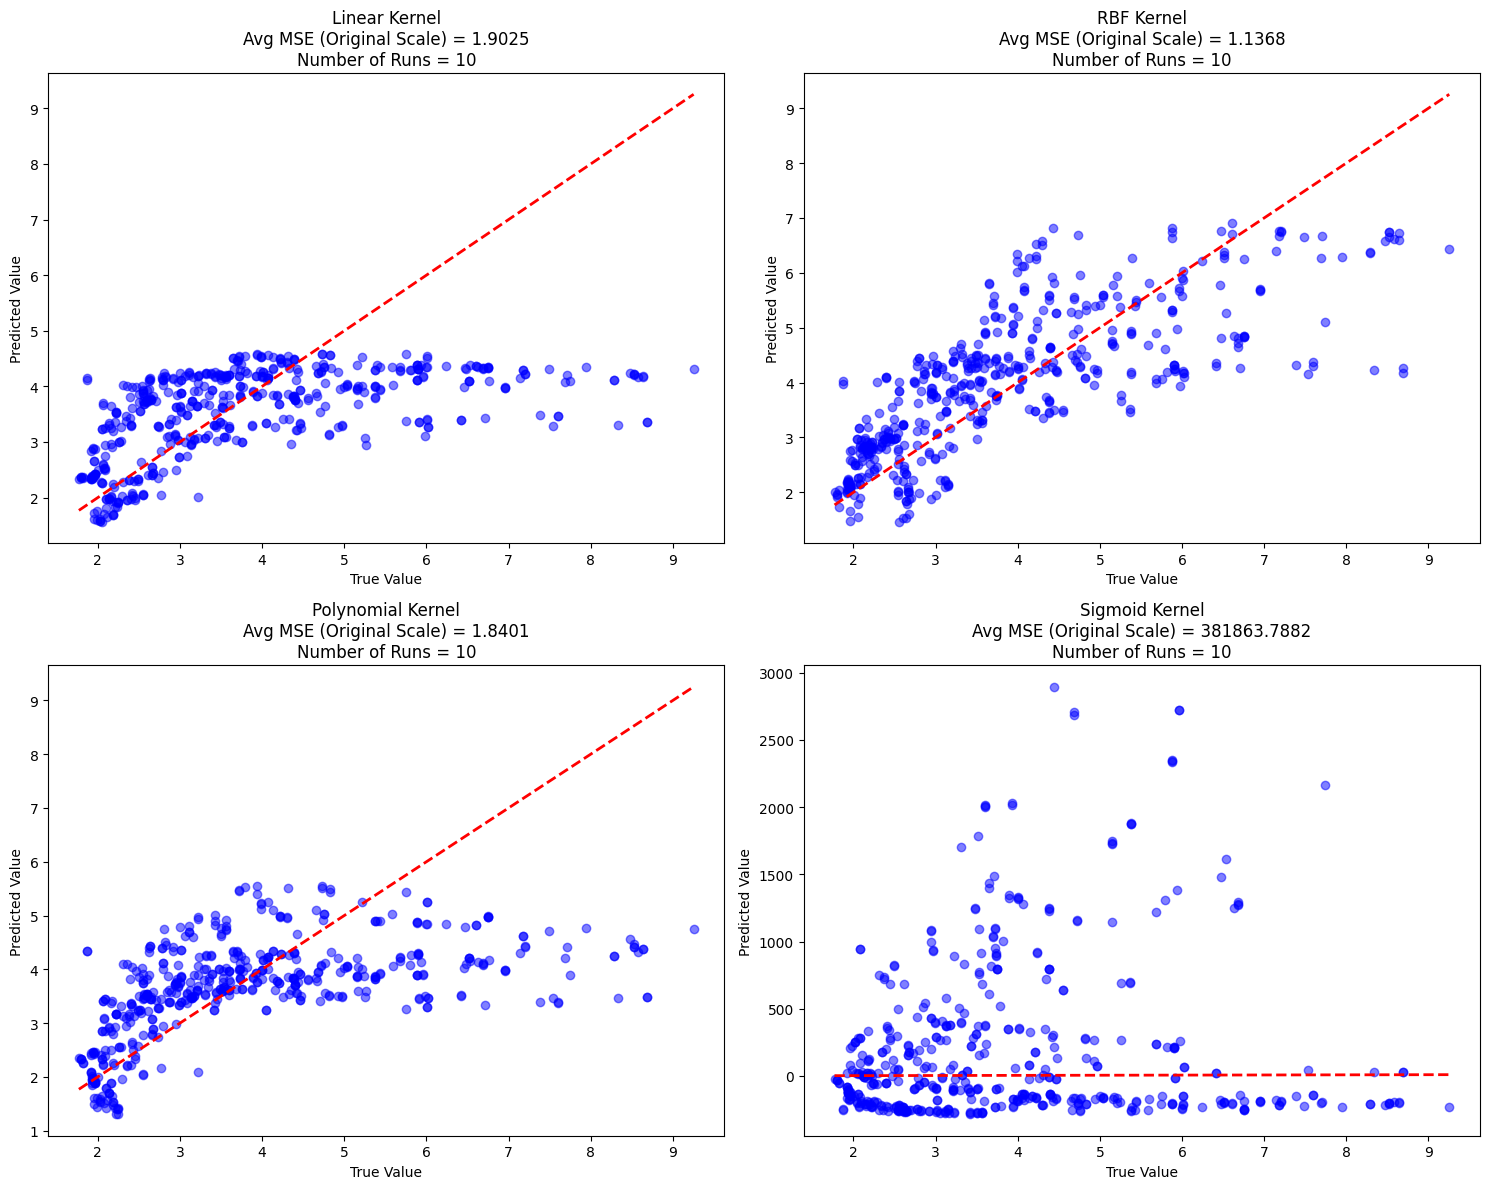

In [ ]:
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 12))
# Load your shapefile into a GeoDataFrame
gdf = gpd.read_file('UK_PPT_DEM_12km.shp')

# Extract features and target variable
features = gdf[['latitude', 'longitude']]
target = gdf['value']

# Initialize scalers
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit scalers and transform the data
scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target.to_numpy().reshape(-1, 1)).ravel()

# Append scaled columns to the original GeoDataFrame
gdf['norm_lat'] = scaled_features[:, 0]
gdf['norm_long'] = scaled_features[:, 1]
gdf['norm_val'] = scaled_target

# Separate coastal points
coastal_points = gdf[gdf['classifica'] == 'coastal']

# Number of runs and range for random state
num_runs = 10
random_states = np.random.randint(0, 100000, num_runs)

# Define kernels to test
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernel_labels = ['Linear', 'RBF', 'Polynomial', 'Sigmoid']

# Initialize dictionaries to store results
mse_results = {kernel: [] for kernel in kernels}
mse_results_normalized = {kernel: [] for kernel in kernels}
all_test = {kernel: [] for kernel in kernels}
all_pred = {kernel: [] for kernel in kernels}

# Loop through each kernel
for kernel in kernels:
    kernel_mse = []
    kernel_mse_normalized = []
    for random_state in random_states:
        # Determine the number of coastal points to be used for testing
        num_coastal_test = int(len(coastal_points) * 0.10)

        # Randomly select 10% of the coastal points for testing
        coastal_test_indices = coastal_points.sample(n=num_coastal_test, random_state=random_state).index

        # Create the test set by selecting the rows with the chosen indices
        test_data = gdf.loc[coastal_test_indices]

        # Create the training dataset by dropping the selected coastal points
        training_data = gdf.drop(coastal_test_indices)

        # Extract features and target variables from the training and test datasets
        X_train = training_data[['norm_lat', 'norm_long']].values
        y_train = training_data['norm_val'].values
        X_test = test_data[['norm_lat', 'norm_long']].values
        y_test = test_data['norm_val'].values

        # Initialize SVR with the kernel
        svr = SVR(kernel=kernel)
        
        # Fit the model
        svr.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred = svr.predict(X_test)
        
        # Inverse transform predictions and true values to original scale
        y_test_orig = target_scaler.inverse_transform(y_test.reshape(-1, 1))
        y_pred_orig = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
        
        # Append to all_test and all_pred
        all_test[kernel].append(y_test_orig.ravel())
        all_pred[kernel].append(y_pred_orig.ravel())
        
        # Calculate performance
        mse_normalized = mean_squared_error(y_test, y_pred)  # MSE on normalized values
        mse_original = mean_squared_error(y_test_orig, y_pred_orig)  # MSE on original values
        
        kernel_mse.append(mse_original)
        kernel_mse_normalized.append(mse_normalized)

    # Flatten lists and convert to numpy arrays
    all_test[kernel] = np.concatenate(all_test[kernel])
    all_pred[kernel] = np.concatenate(all_pred[kernel])

    # Average MSE over all runs
    avg_mse_original = np.mean(kernel_mse)
    avg_mse_normalized = np.mean(kernel_mse_normalized)
    
    # Store results
    mse_results[kernel].append(avg_mse_original)
    mse_results_normalized[kernel].append(avg_mse_normalized)
    
    # Print average MSE
    print(f'{kernel_labels[kernels.index(kernel)]} Kernel:')
    print(f'  Average Mean Squared Error (Original Scale) = {avg_mse_original:.4f}')
    print(f'  Average Mean Squared Error (Normalized Scale) = {avg_mse_normalized:.4f}')
    
    # Plot True vs. Predicted for this kernel
    plt.subplot(2, 2, kernels.index(kernel) + 1)  # 2x2 grid
    plt.scatter(all_test[kernel], all_pred[kernel], alpha=0.5, color='blue')
    plt.plot([all_test[kernel].min(), all_test[kernel].max()], [all_test[kernel].min(), all_test[kernel].max()], 'r--', lw=2)  # Line for perfect fit
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.title(f'{kernel_labels[kernels.index(kernel)]} Kernel\nAvg MSE (Original Scale) = {avg_mse_original:.4f}\nNumber of Runs = {num_runs}')

plt.tight_layout()
plt.show()


## Summary of Results 

Overall Process

Scaling of Data ( Converting the whole data set between 0 and 1 )
Fitting in SVR
Inverse Scaling 

The Sigmoid Kernel takes a large ammount of time to fit the data and at the same time does not give a decent enough MSE, at the same time poly kernel takes a significantly larger time to process and fit so we narrow down to 2 kernels linear and rbf. For the next runs

3 Variables ( Lat, Long and Value)

Taking out coastal points and imputing with whole data set 


Linear Kernel:
  Average Mean Squared Error (Original Scale) = 1.7657
  Average Mean Squared Error (Normalized Scale) = 0.0208
RBF Kernel:
  Average Mean Squared Error (Original Scale) = 0.9979
  Average Mean Squared Error (Normalized Scale) = 0.0118



Coastal points only used to to impute missing Coastal points  

Linear Kernel:
  Average Mean Squared Error (Original Scale) = 1.6869
  Average Mean Squared Error (Normalized Scale) = 0.0199
RBF Kernel:
  Average Mean Squared Error (Original Scale) = 1.1028
  Average Mean Squared Error (Normalized Scale) = 0.0130



4 variables ( Lat long value DEM )

All for coastal 
                                                                              
Linear Kernel:
  Average Mean Squared Error (Original Scale) = 1.5560
  Average Mean Squared Error (Normalized Scale) = 0.0183
                                                                           
RBF Kernel:
  Average Mean Squared Error (Original Scale) = 0.9149
  Average Mean Squared Error (Normalized Scale) = 0.0108

Only Coastal points for Coastal Imputation 

Linear Kernel:
  Average Mean Squared Error (Original Scale) = 1.2550
  Average Mean Squared Error (Normalized Scale) = 0.0148

RBF Kernel:
  Average Mean Squared Error (Original Scale) = 0.9154
  Average Mean Squared Error (Normalized Scale) = 0.0108





Without Scaling Run 
Linear Kernel taking really long to fit the data onto the 







Concerns 

Questions about DEM files and mask left (real imputation points)
- Is resampling fine for 12km resolution (what to do if no)
- Should points of this be used in decision making of which points are coastal and not 


- Coastal point selection might have impact on overall data set, some points we are deifining coastal now might not be correct (Real mask that has to be imputed )
- Any other validation approach or current one is fine (Repeated Holdout Cross-Validation)
- Add more variables or go to next imputation algorithm 

- Validation with original 
- Future approaches 

- Writing 

SVR and KNN 

Why SVR is working and KNN is not
KNN cross fold validation  SVR cross fold with 2 pixel inner considered as coastal 

optimise SVR 


DEM outer resamplled up (which method cross verify)

Maybe answer to why KNN is working better then SVR 

KNN is a highly local algorithm, SVR is a global data algorithm the results from KNN are highly locallly sensitive, while SVR takes the whole data set into considration for imputation therefore this theory can be cross validated  using dividing the data sets into various folds 

Liker search radius for optimal result in KNN is 25 Km at max i.e 2 pixels while search radius for SVR currently is whole grid. 

So Idea is to make clusters of points based on lat and long maybe 10-20 or lesser number of points 


How to make CLusters that is the thing ?? 